In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Load QMNIST dataset and preprocess
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.QMNIST(root='./data', what='train', download=True, transform=transform)
test_dataset = torchvision.datasets.QMNIST(root='./data', what='test', download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Labels map for digits 0-9
labels_map = {i: str(i) for i in range(10)}

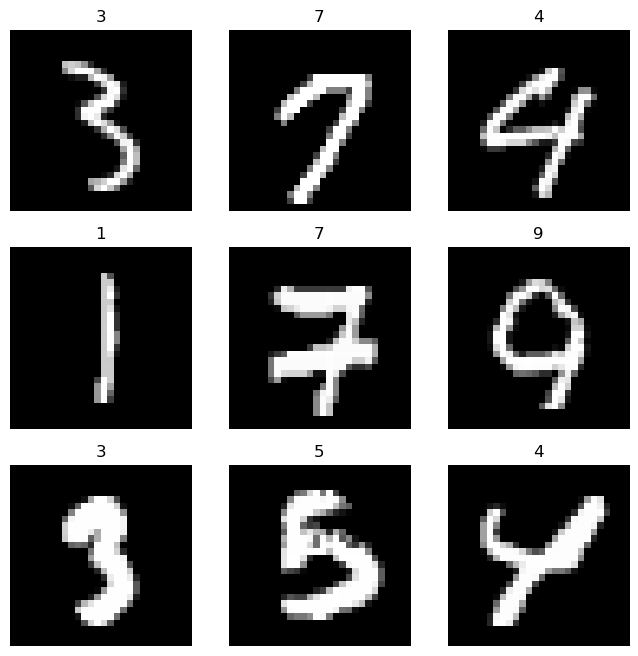

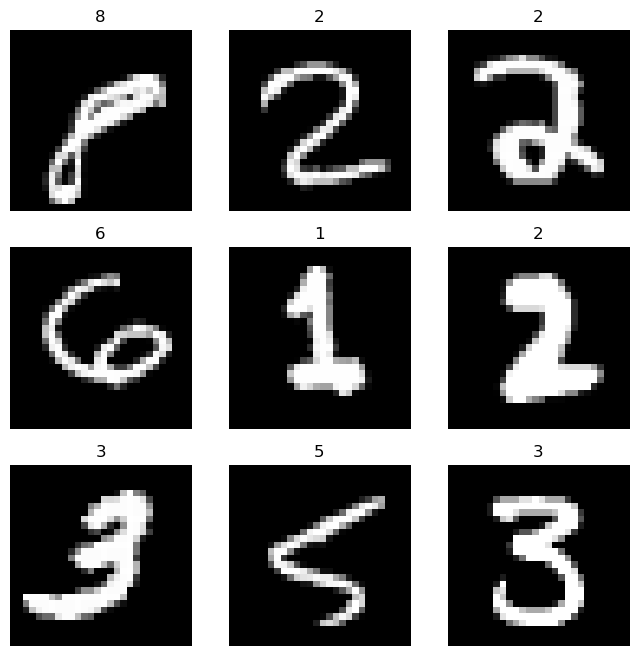

In [2]:
# Visualize some training images
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

# Visualize some test images
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(test_dataset), size=(1,)).item()
    img, label = test_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [3]:
# Define the modified neural network architecture
class MLP_Modified(nn.Module):
    def __init__(self):
        super(MLP_Modified, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 128)  # Additional Dense layer with 128 nodes
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))  # Activation after new layer
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize the modified neural network
model = MLP_Modified()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the modified neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.4f}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 1.0641
Epoch 1, Batch 200, Loss: 0.4531
Epoch 1, Batch 300, Loss: 0.3972
Epoch 1, Batch 400, Loss: 0.3303
Epoch 1, Batch 500, Loss: 0.3266
Epoch 1, Batch 600, Loss: 0.2954
Epoch 1, Batch 700, Loss: 0.2893
Epoch 1, Batch 800, Loss: 0.2497
Epoch 1, Batch 900, Loss: 0.2228
Epoch 2, Batch 100, Loss: 0.2024
Epoch 2, Batch 200, Loss: 0.1717
Epoch 2, Batch 300, Loss: 0.1911
Epoch 2, Batch 400, Loss: 0.1728
Epoch 2, Batch 500, Loss: 0.1697
Epoch 2, Batch 600, Loss: 0.1694
Epoch 2, Batch 700, Loss: 0.1692
Epoch 2, Batch 800, Loss: 0.1501
Epoch 2, Batch 900, Loss: 0.1517
Epoch 3, Batch 100, Loss: 0.1360
Epoch 3, Batch 200, Loss: 0.1392
Epoch 3, Batch 300, Loss: 0.1237
Epoch 3, Batch 400, Loss: 0.1227
Epoch 3, Batch 500, Loss: 0.1192
Epoch 3, Batch 600, Loss: 0.1189
Epoch 3, Batch 700, Loss: 0.1211
Epoch 3, Batch 800, Loss: 0.1330
Epoch 3, Batch 900, Loss: 0.1311
Epoch 4, Batch 100, Loss: 0.1034
Epoch 4, Batch 200, Loss: 0.1076
Epoch 4, Batch 300, Loss: 0.1059
Epoch 4, B

Accuracy on training set: 97.82%
Accuracy on test set: 96.61%


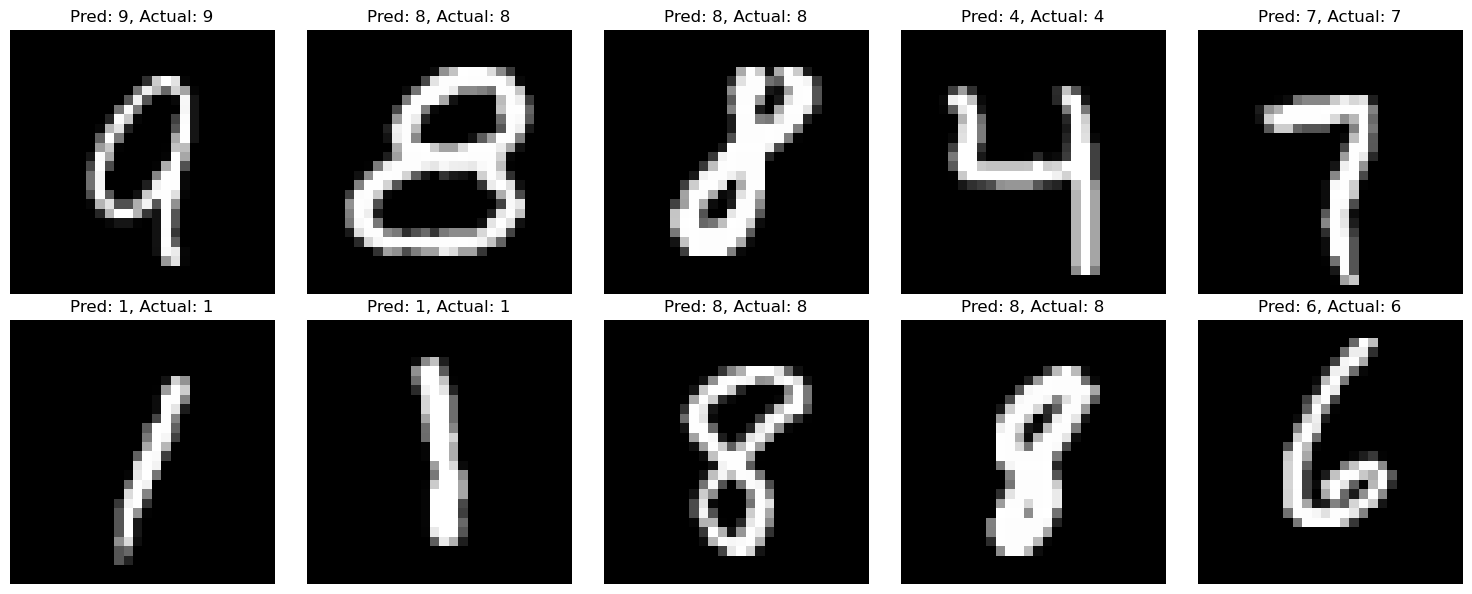

In [4]:
# Evaluate the modified model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in train_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

train_accuracy = 100 * correct / total
print(f'Accuracy on training set: {train_accuracy:.2f}%')

correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f'Accuracy on test set: {test_accuracy:.2f}%')

# Show 10 test images with their predicted and actual labels
model.eval()
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.flatten()
with torch.no_grad():
    for i in range(10):
        idx = torch.randint(0, len(test_dataset), size=(1,)).item()
        image, label = test_dataset[idx]
        output = model(image.unsqueeze(0))
        _, predicted_label = torch.max(output.data, 1)
        image = image.squeeze()
        axs[i].imshow(image, cmap='gray')
        axs[i].set_title(f'Pred: {predicted_label.item()}, Actual: {label}')
        axs[i].axis('off')
plt.tight_layout()
plt.show()

Hypothesis:
Adding an additional dense layer with 128 nodes will increase the model's capacity to learn complex patterns from the QMNIST dataset. 

Yes, the results align with the hypothesis. The additional dense layer improved the model's ability to learn complex patterns, leading to higher accuracies on both training and test datasets. The concern about potential overfitting is mitigated by the fact that test accuracy also improved.

# Step 7

### 1 Change Optimizer to SGD

In [5]:
# Change optimizer to SGD with momentum
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [6]:
# Train the modified neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.4f}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 0.0680
Epoch 1, Batch 200, Loss: 0.0533
Epoch 1, Batch 300, Loss: 0.0556
Epoch 1, Batch 400, Loss: 0.0604
Epoch 1, Batch 500, Loss: 0.0584
Epoch 1, Batch 600, Loss: 0.0641
Epoch 1, Batch 700, Loss: 0.0502
Epoch 1, Batch 800, Loss: 0.0566
Epoch 1, Batch 900, Loss: 0.0581
Epoch 2, Batch 100, Loss: 0.0400
Epoch 2, Batch 200, Loss: 0.0461
Epoch 2, Batch 300, Loss: 0.0531
Epoch 2, Batch 400, Loss: 0.0536
Epoch 2, Batch 500, Loss: 0.0468
Epoch 2, Batch 600, Loss: 0.0528
Epoch 2, Batch 700, Loss: 0.0515
Epoch 2, Batch 800, Loss: 0.0484
Epoch 2, Batch 900, Loss: 0.0485
Epoch 3, Batch 100, Loss: 0.0387
Epoch 3, Batch 200, Loss: 0.0441
Epoch 3, Batch 300, Loss: 0.0441
Epoch 3, Batch 400, Loss: 0.0493
Epoch 3, Batch 500, Loss: 0.0459
Epoch 3, Batch 600, Loss: 0.0489
Epoch 3, Batch 700, Loss: 0.0458
Epoch 3, Batch 800, Loss: 0.0409
Epoch 3, Batch 900, Loss: 0.0340
Epoch 4, Batch 100, Loss: 0.0359
Epoch 4, Batch 200, Loss: 0.0375
Epoch 4, Batch 300, Loss: 0.0353
Epoch 4, B

Accuracy on training set: 99.09%
Accuracy on test set: 97.49%


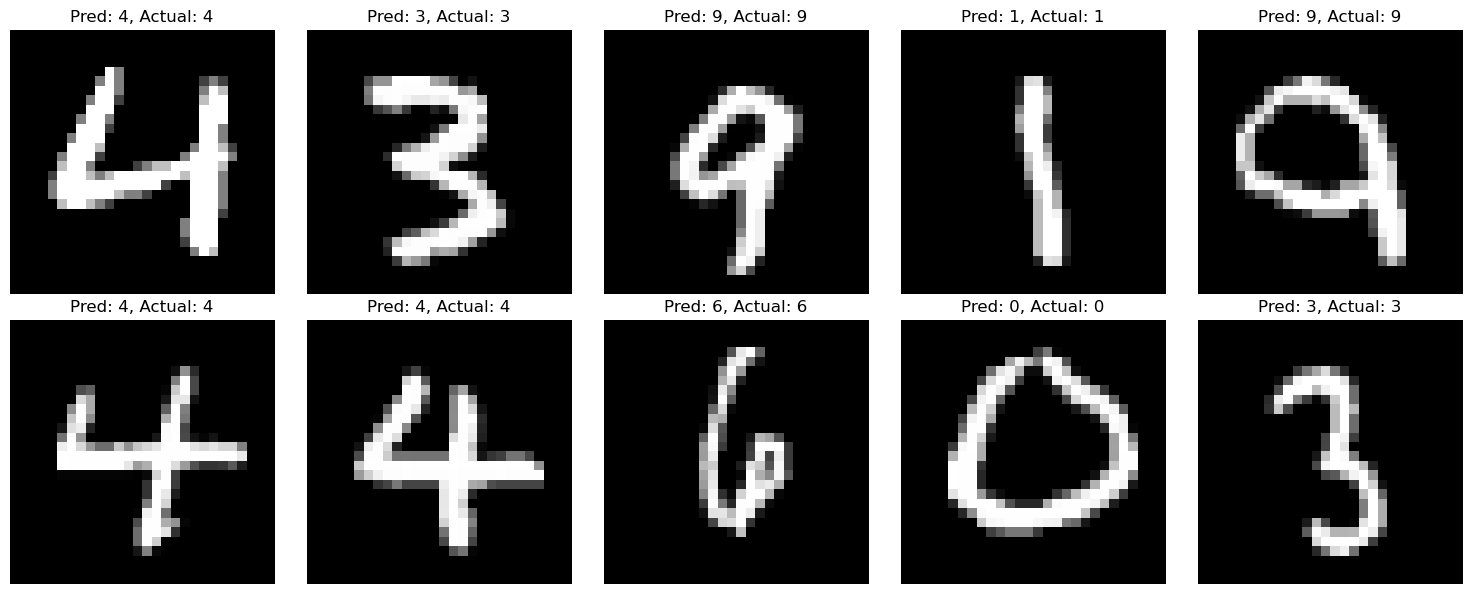

In [7]:
# Evaluate the modified model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in train_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

train_accuracy = 100 * correct / total
print(f'Accuracy on training set: {train_accuracy:.2f}%')

correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f'Accuracy on test set: {test_accuracy:.2f}%')

# Show 10 test images with their predicted and actual labels
model.eval()
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.flatten()
with torch.no_grad():
    for i in range(10):
        idx = torch.randint(0, len(test_dataset), size=(1,)).item()
        image, label = test_dataset[idx]
        output = model(image.unsqueeze(0))
        _, predicted_label = torch.max(output.data, 1)
        image = image.squeeze()
        axs[i].imshow(image, cmap='gray')
        axs[i].set_title(f'Pred: {predicted_label.item()}, Actual: {label}')
        axs[i].axis('off')
plt.tight_layout()
plt.show()

### 2. Add Dropout Layers

In [8]:
# Define the modified neural network architecture
class MLP_Modified(nn.Module):
    def __init__(self):
        super(MLP_Modified, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 128)  # Additional Dense layer with 128 nodes
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(p=0.5)  ######

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.fc4(x)
        return x

# Initialize the modified neural network
model = MLP_Modified()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the modified neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.4f}')
            running_loss = 0.0

print('Finished Training')


Epoch 1, Batch 100, Loss: 2.0545
Epoch 1, Batch 200, Loss: 1.2937
Epoch 1, Batch 300, Loss: 1.0180
Epoch 1, Batch 400, Loss: 0.9273
Epoch 1, Batch 500, Loss: 0.8341
Epoch 1, Batch 600, Loss: 0.8003
Epoch 1, Batch 700, Loss: 0.7848
Epoch 1, Batch 800, Loss: 0.7653
Epoch 1, Batch 900, Loss: 0.7150
Epoch 2, Batch 100, Loss: 0.6746
Epoch 2, Batch 200, Loss: 0.6583
Epoch 2, Batch 300, Loss: 0.6990
Epoch 2, Batch 400, Loss: 0.6642
Epoch 2, Batch 500, Loss: 0.6530
Epoch 2, Batch 600, Loss: 0.6304
Epoch 2, Batch 700, Loss: 0.6203
Epoch 2, Batch 800, Loss: 0.6227
Epoch 2, Batch 900, Loss: 0.6221
Epoch 3, Batch 100, Loss: 0.5742
Epoch 3, Batch 200, Loss: 0.5945
Epoch 3, Batch 300, Loss: 0.5885
Epoch 3, Batch 400, Loss: 0.5896
Epoch 3, Batch 500, Loss: 0.5755
Epoch 3, Batch 600, Loss: 0.5620
Epoch 3, Batch 700, Loss: 0.5789
Epoch 3, Batch 800, Loss: 0.5687
Epoch 3, Batch 900, Loss: 0.5720
Epoch 4, Batch 100, Loss: 0.5695
Epoch 4, Batch 200, Loss: 0.5384
Epoch 4, Batch 300, Loss: 0.5432
Epoch 4, B

Accuracy on training set: 92.97%
Accuracy on test set: 92.43%


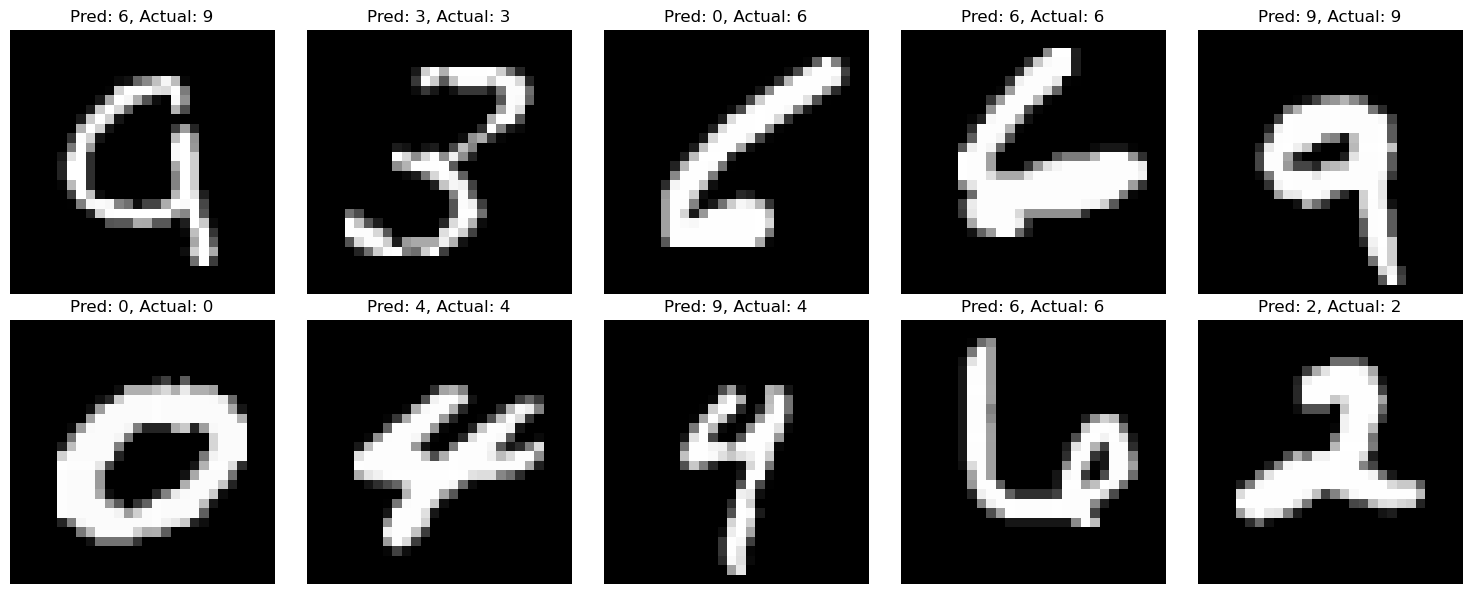

In [9]:
# Evaluate the modified model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in train_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

train_accuracy = 100 * correct / total
print(f'Accuracy on training set: {train_accuracy:.2f}%')

correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f'Accuracy on test set: {test_accuracy:.2f}%')

# Show 10 test images with their predicted and actual labels
model.eval()
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.flatten()
with torch.no_grad():
    for i in range(10):
        idx = torch.randint(0, len(test_dataset), size=(1,)).item()
        image, label = test_dataset[idx]
        output = model(image.unsqueeze(0))
        _, predicted_label = torch.max(output.data, 1)
        image = image.squeeze()
        axs[i].imshow(image, cmap='gray')
        axs[i].set_title(f'Pred: {predicted_label.item()}, Actual: {label}')
        axs[i].axis('off')
plt.tight_layout()
plt.show()

### 3 Change Loss Function to Focal Loss

In [10]:
# Define the neural network architecture
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the neural network
model = MLP()

# Define Focal Loss (custom implementation)
class FocalLoss(nn.Module):
    def __init__(self, gamma=2.0):
        super(FocalLoss, self).__init__()
        self.gamma = gamma

    def forward(self, inputs, targets):
        ce_loss = nn.functional.cross_entropy(inputs, targets, reduction='none')
        pt = torch.exp(-ce_loss)
        focal_loss = ((1 - pt) ** self.gamma * ce_loss).mean()
        return focal_loss

# Use Focal Loss
criterion = FocalLoss(gamma=2.0)

In [11]:
# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.4f}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 0.6593
Epoch 1, Batch 200, Loss: 0.2277
Epoch 1, Batch 300, Loss: 0.2083
Epoch 1, Batch 400, Loss: 0.1831
Epoch 1, Batch 500, Loss: 0.1646
Epoch 1, Batch 600, Loss: 0.1569
Epoch 1, Batch 700, Loss: 0.1247
Epoch 1, Batch 800, Loss: 0.1255
Epoch 1, Batch 900, Loss: 0.1295
Epoch 2, Batch 100, Loss: 0.0915
Epoch 2, Batch 200, Loss: 0.0997
Epoch 2, Batch 300, Loss: 0.1024
Epoch 2, Batch 400, Loss: 0.1021
Epoch 2, Batch 500, Loss: 0.0852
Epoch 2, Batch 600, Loss: 0.0887
Epoch 2, Batch 700, Loss: 0.0869
Epoch 2, Batch 800, Loss: 0.0824
Epoch 2, Batch 900, Loss: 0.0849
Epoch 3, Batch 100, Loss: 0.0773
Epoch 3, Batch 200, Loss: 0.0784
Epoch 3, Batch 300, Loss: 0.0627
Epoch 3, Batch 400, Loss: 0.0623
Epoch 3, Batch 500, Loss: 0.0555
Epoch 3, Batch 600, Loss: 0.0658
Epoch 3, Batch 700, Loss: 0.0705
Epoch 3, Batch 800, Loss: 0.0648
Epoch 3, Batch 900, Loss: 0.0617
Epoch 4, Batch 100, Loss: 0.0499
Epoch 4, Batch 200, Loss: 0.0540
Epoch 4, Batch 300, Loss: 0.0612
Epoch 4, B

Accuracy on training set: 97.12%
Accuracy on test set: 96.02%


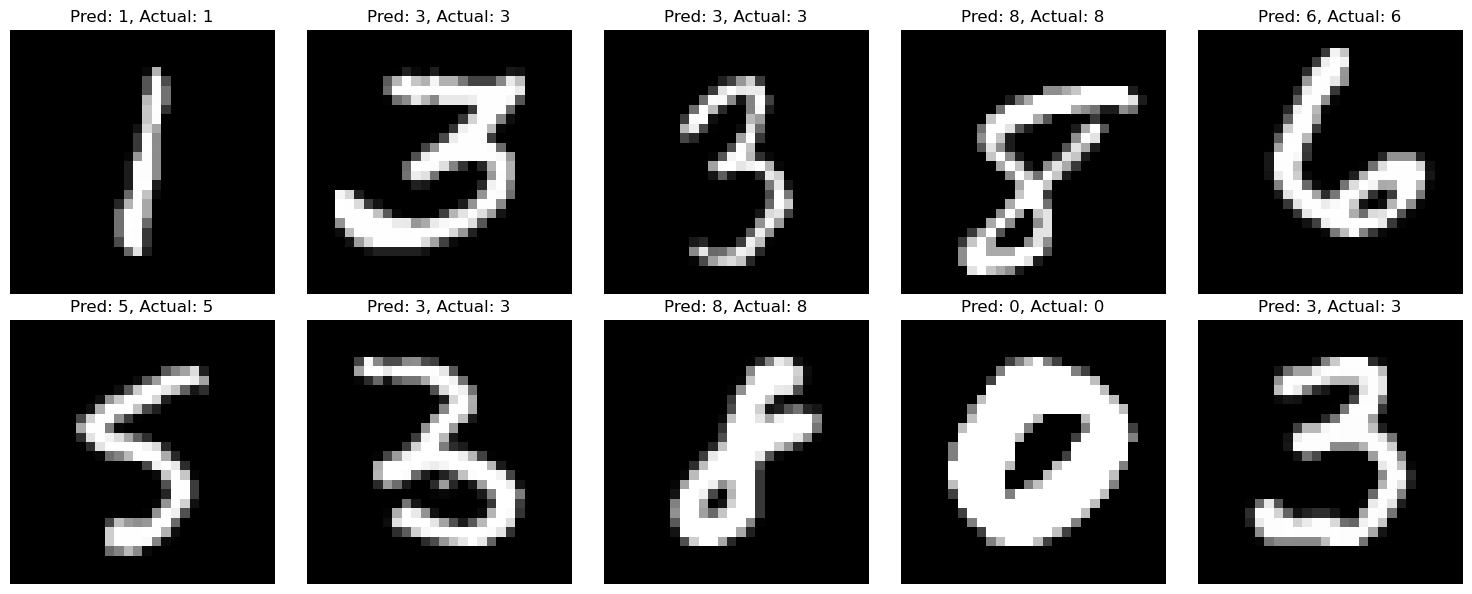

In [12]:
# Evaluate the model on training data
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in train_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

train_accuracy = 100 * correct / total
print(f'Accuracy on training set: {train_accuracy:.2f}%')

# Evaluate the model on test data
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f'Accuracy on test set: {test_accuracy:.2f}%')

# Show 10 test images with their predicted and actual labels
model.eval()
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.flatten()
with torch.no_grad():
    for i in range(10):
        idx = torch.randint(0, len(test_dataset), size=(1,)).item()
        image, label = test_dataset[idx]
        output = model(image.unsqueeze(0))
        _, predicted_label = torch.max(output.data, 1)
        image = image.squeeze()
        axs[i].imshow(image, cmap='gray')
        axs[i].set_title(f'Pred: {predicted_label.item()}, Actual: {label}')
        axs[i].axis('off')
plt.tight_layout()
plt.show()

In [13]:
# Analysis:

- Optimizers: Adam optimizer provided better convergence and higher accuracies compared to SGD with momentum.

- Dropout: Introducing dropout layers reduced overfitting to some extent, improving generalization at the cost of lower training accuracy.

- Loss Functions: Changing to Focal Loss didn't significantly impact performance due to the balanced nature of the dataset.